# Fraud Detection Explorotary Data Analysis of the Dataset



In [1]:
# Import of all the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

## Import of Dataset

Import of the datasets into Panda dataframe

Initial modifications to add an ID and use it instead of the Time 



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import of the train and test datasets into the Panda dataframe

cc_test_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_test.csv")
cc_train_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/creditcard_train.csv")

cc_test_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,71852.0,-0.584007,0.880079,1.320090,0.001509,0.292260,-0.990634,1.120755,-0.166826,-0.501695,-0.694423,-0.706512,-0.164179,-0.276469,0.284019,0.164088,0.265888,-0.739878,-0.034332,-1.077470,-0.106804,0.167209,0.361133,-0.125141,0.375231,0.029598,-0.559438,0.102098,0.144502,42.81,0
1,48336.0,1.326714,-0.823441,-0.127404,-0.979830,-0.625116,-0.104941,-0.636415,0.050208,-0.785860,0.815473,0.200606,-1.002079,-1.025594,0.271240,0.320012,1.751346,-0.362698,-0.350818,1.235828,0.164916,0.109578,-0.011447,-0.212676,-0.859332,0.507870,-0.199817,-0.021529,0.003230,75.00,0
2,166298.0,2.097691,-0.076097,-1.743719,-0.011746,0.597501,-0.332470,0.130716,-0.174237,0.383371,0.171848,0.110069,0.740958,0.344720,0.589561,0.147784,0.230686,-1.103407,0.675318,0.395078,-0.192933,0.233496,0.825427,-0.143247,-1.115397,0.374189,-0.056085,-0.020643,-0.079921,2.29,0
3,40650.0,-1.593912,2.215525,0.210067,-0.236255,-0.002224,-0.058601,-0.392776,-2.005520,-0.306309,-0.253465,-0.892002,0.681270,1.539975,-0.407657,0.740105,0.687552,-0.019201,0.040053,0.133313,-0.258684,1.995801,-1.554302,0.261539,-0.531345,0.124584,0.146124,0.346683,0.104860,8.99,0
4,121428.0,1.863194,0.265005,-0.261564,3.853830,0.220877,0.773558,-0.296455,0.207090,-0.487512,1.454433,-0.245666,0.610215,-0.153871,-0.147691,-2.586887,0.606259,-0.701786,0.034701,-0.923304,-0.311545,0.118870,0.611417,0.034731,-0.387779,0.103574,0.140670,-0.003506,-0.061238,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85438,116793.0,-0.753070,1.600625,-1.694466,-1.448546,1.130943,-0.976420,1.167232,0.201294,-0.245013,0.113600,-0.376961,-0.064316,-1.027914,1.212622,-0.719329,-0.053734,-0.817776,0.558632,0.478907,0.050720,0.202703,0.725051,-0.303092,-1.016408,-0.107503,0.146474,0.469657,0.304103,0.75,0
85439,57942.0,-0.539994,0.515511,2.029197,0.514863,-0.043655,-0.275000,0.851781,-0.059080,0.319422,-0.573884,-0.550373,-0.258060,-1.541622,-0.192496,-0.756751,-0.702496,0.159027,-0.787307,-1.142297,-0.173193,0.059047,0.441880,-0.048056,0.574042,-0.252453,-0.545212,-0.007875,-0.067811,40.00,0
85440,53165.0,-1.833594,-1.015652,1.217378,-1.464593,-0.448623,-0.955303,-0.496368,0.481275,-1.151529,-0.210526,-1.014940,-0.517389,0.895314,-0.274270,0.320422,1.832300,-0.170460,-0.889855,-0.041644,0.754963,0.363656,0.279139,0.166895,-0.118669,-0.005576,-0.438610,0.209083,-0.049870,140.00,0
85441,166438.0,1.373911,-0.999031,-1.694373,1.057884,-0.413288,-1.033805,0.412863,-0.382925,0.640802,-0.550427,-0.477887,0.329516,0.595095,-1.184722,0.311344,0.375467,0.528451,0.493846,-0.607897,0.537641,0.470784,0.868639,-0.348918,0.059266,0.041987,0.580518,-0.086933,0.025684,343.39,0


In [4]:
# Functiona to create a list to be used as ID for the data frame 
def id_create(df):
    id = []
    for i in range(df.shape[0]):
        id.append(i+1)
    return id

# For the test data frame created an ID list and added to the data frame 
id_test = id_create(cc_test_df)
cc_test_df["Id"] = id_test
cc_test_df.set_index("Id", inplace=True)

# For the train data frame created an ID list and added to the data frame 
id_train = id_create(cc_train_df)
cc_train_df["Id"] = id_train
cc_train_df.set_index("Id", inplace=True)



## Check the missing value

The dataframe information and description along with the missing label plots shows that there isn't any missing or NA value


In [5]:
print("Dataframe information of the train dataset")
print(cc_train_df.info())
print()
print("Dataframe information of the test dataset")
print(cc_test_df.info())


Dataframe information of the train dataset
<class 'pandas.core.frame.DataFrame'>
Int64Index: 199364 entries, 1 to 199364
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    199364 non-null  float64
 1   V1      199364 non-null  float64
 2   V2      199364 non-null  float64
 3   V3      199364 non-null  float64
 4   V4      199364 non-null  float64
 5   V5      199364 non-null  float64
 6   V6      199364 non-null  float64
 7   V7      199364 non-null  float64
 8   V8      199364 non-null  float64
 9   V9      199364 non-null  float64
 10  V10     199364 non-null  float64
 11  V11     199364 non-null  float64
 12  V12     199364 non-null  float64
 13  V13     199364 non-null  float64
 14  V14     199364 non-null  float64
 15  V15     199364 non-null  float64
 16  V16     199364 non-null  float64
 17  V17     199364 non-null  float64
 18  V18     199364 non-null  float64
 19  V19     199364 non-null  float64
 20  V20  

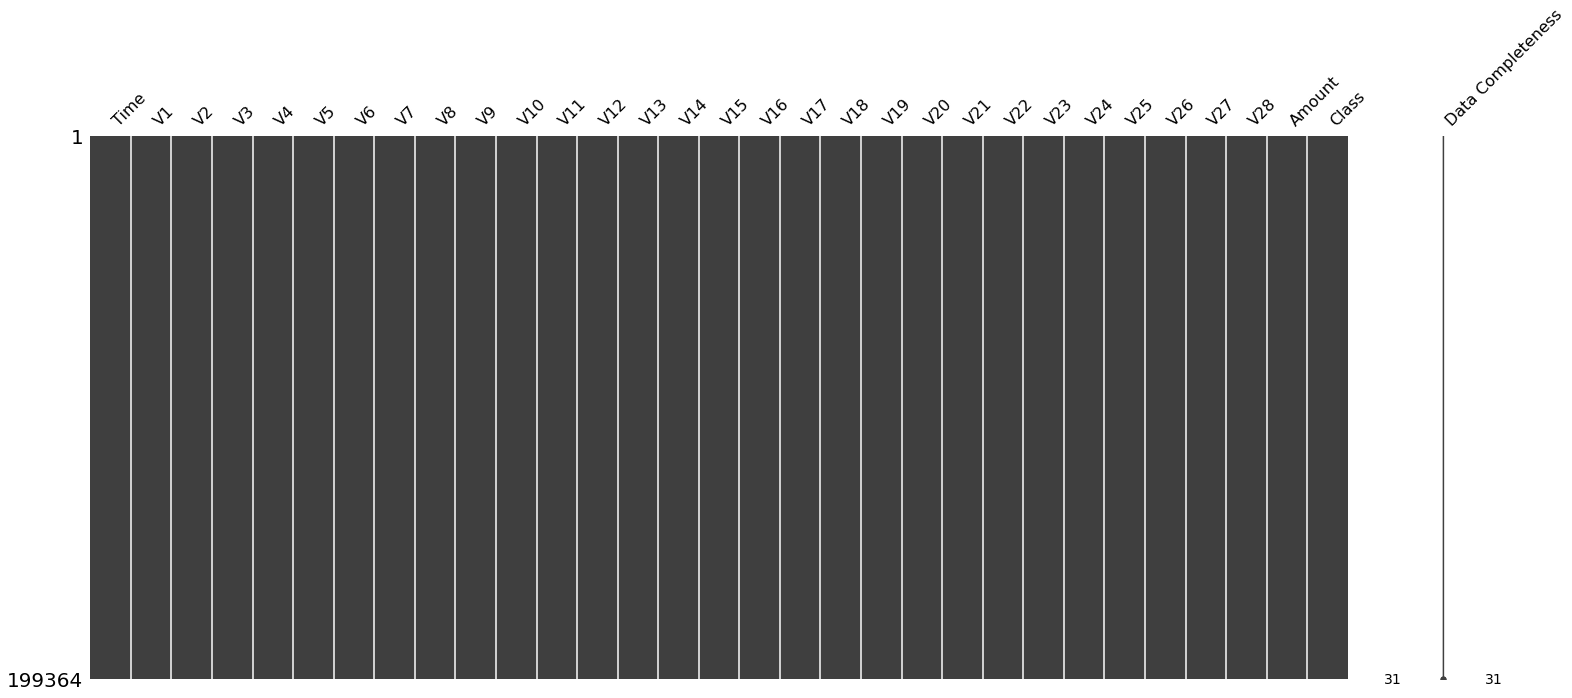

In [6]:
# Missing label plot for the train dataset
msno.matrix(cc_train_df, labels=True)

In [ ]:
# Missing label plot for the test dataset
msno.matrix(cc_test_df, labels=True)

In [7]:
print("Dataframe description of the train dataset")
print(cc_train_df.describe())
print()
print("Dataframe description of the test dataset")
print(cc_test_df.describe())


Dataframe description of the train dataset
                Time             V1  ...         Amount          Class
count  199364.000000  199364.000000  ...  199364.000000  199364.000000
mean    94806.201064       0.004189  ...      88.761549       0.001826
std     47511.693849       1.954728  ...     253.776731       0.042691
min         0.000000     -56.407510  ...       0.000000       0.000000
25%     54206.250000      -0.918115  ...       5.500000       0.000000
50%     84650.000000       0.023565  ...      21.990000       0.000000
75%    139350.250000       1.317063  ...      77.000000       0.000000
max    172792.000000       2.454930  ...   25691.160000       1.000000

[8 rows x 31 columns]

Dataframe description of the test dataset
                Time            V1  ...        Amount         Class
count   85443.000000  85443.000000  ...  85443.000000  85443.000000
mean    94831.729164     -0.009775  ...     87.388463      0.001498
std     47433.429276      1.967899  ...    241.3

## Duplicate values




In [8]:
# Dupplicate in the train dataset
print("Number of dupplicate in the training set ", cc_train_df.duplicated().sum())

# Dupplicate in the test dataset
print("Number of dupplicate in the test set ", cc_test_df.duplicated().sum())


Number of dupplicate in the training set  585
Number of dupplicate in the test set  131


In [9]:
# Dropping the duplicate and keeping the first of the training  dataset
cc_train_df.drop_duplicates(keep='first', inplace=True)


In [10]:
# Dupplicate in the train dataset
print("Number of dupplicate in the training set ", cc_train_df.duplicated().sum())

# Dupplicate in the test dataset
print("Number of dupplicate in the test set ", cc_test_df.duplicated().sum())

Number of dupplicate in the training set  0
Number of dupplicate in the test set  131


## Data type

The Class column in data frame is of type float64
It's value can be only 0 o 1, so this will be converted to the category type

In [11]:
# Conversion to a category type
cc_train_df["Class"] = cc_train_df["Class"].astype("category")
cc_train_df["Class"].describe()

count     198779
unique         2
top            0
freq      198424
Name: Class, dtype: int64

In [12]:
# Conversion to a category type
cc_test_df["Class"] = cc_test_df["Class"].astype("category")
cc_test_df["Class"].describe()

count     85443
unique        2
top           0
freq      85315
Name: Class, dtype: int64

## Datset Corelation

Exploring the dataset correlation


In [13]:
# list of all the columns minus the "Class"
columns = cc_test_df.columns.tolist()
columns_to_remove = ["Class"]

## Remove a list from another list
columns = [var for var in columns if var not in columns_to_remove]
columns

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [ ]:
# Tried to run the below code to get the picture for all the features but it wouldn't show all the picture, tried VSCode and Jupyter notebook
# So i will plot the each of the feature separately
'''
for i, cat in enumerate(columns):
  fig = px.scatter(cc_train_df, x=cat, y="Class")
  fig.show()
'''

In [14]:
# Function to plot the scatter plot and violin plot

def plotting(x, y):
    title = "Scatter plot training set " + x + " vs " + y
    fig = px.scatter(cc_train_df, x=x, y=y, title=title)
    fig.show()

    title = "Violin plot training set " + x + " vs " + y
    fig = px.violin(cc_train_df, y=y, x=x, box=True, title=title)
    fig.update_layout(xaxis_type="category", xaxis={'categoryorder':'mean ascending'})
    fig.show()

    title = "Test set " + x + " vs " + y
    fig = px.scatter(cc_test_df, x=x, y=y, title=title)
    fig.show()

    title = "Violin plot test set " + x + " vs " + y
    fig = px.violin(cc_test_df, y=y, x=x, box=True, title=title)
    fig.update_layout(xaxis_type="category", xaxis={'categoryorder':'mean ascending'})
    fig.show()
  
  

In [ ]:
# Correlation of the Time

plotting("Class", "Time")


There is correlation Between V4 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V1
plotting("Class", "V1")


There is correlation Between V1 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers below -40

In [ ]:
# Correlation of the V2
plotting("Class", "V2")

There is correlation Between V2 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers below -40

In [ ]:
# Correlation of the V3
plotting("Class", "V3")

There is correlation Between V3 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers below -35

In [ ]:
# Correlation of the V4
plotting("Class", "V4")

There is correlation Between V4 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 15

In [ ]:
# Correlation of the V5
plotting("Class", "V5")

There is correlation Between V5 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 40 and less than 40

In [ ]:
# Correlation of the V6
plotting("Class", "V6")

There is correlation Between V6 and the Classification of the Fraud detection based on the above graphs and data dispersion


Outliers greater than 25

In [ ]:
# Correlation of the V7
plotting("Class", "V7")

There is correlation Between V7 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 60

In [ ]:
# Correlation of the V8
plotting("Class", "V8")

There is correlation Between V4 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V9
plotting("Class", "V9")

There is correlation Between V9 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 15

In [ ]:
# Correlation of the V10
plotting("Class", "V10")

There is correlation Between V10 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 20

In [ ]:
# Correlation of the V11
plotting("Class", "V11")

There is correlation Between V11 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V12
plotting("Class", "V12")

There is correlation Between V12 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V13
plotting("Class", "V13")

There isn't any correlation Between V13 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 6

In [ ]:
# Correlation of the V14
plotting("Class", "V14")

There is correlation Between V14 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V15
plotting("Class", "V15")

There isn't correlation Between V15 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 6

In [ ]:
# Correlation of the V16
plotting("Class", "V16")

There is correlation Between V16 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 10

In [ ]:
# Correlation of the V17
plotting("Class", "V17")

There is correlation Between V17 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V18
plotting("Class", "V18")

There is correlation Between V18 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers none

In [ ]:
# Correlation of the V19
plotting("Class", "V19")

There is correlation Between V19 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -6

In [ ]:
# Correlation of the V20
plotting("Class", "V20")

There is correlation Between V20 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -40

In [ ]:
# Correlation of the V21
plotting("Class", "V21")

There is correlation Between V21 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 20 and less than -20

In [ ]:
# Correlation of the V22
plotting("Class", "V22")

There is correlation Between V22 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 10 and less than 10

In [ ]:
# Correlation of the V23
plotting("Class", "V23")

There is correlation Between V23 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -40

In [ ]:
# Correlation of the V24
plotting("Class", "V24")

There is correlation Between V24 and the Classification of the Fraud detection based on the above graphs and data dispersion even though looks like is slight

Outliers greater than 2.5

In [ ]:
# Correlation of the V25
plotting("Class", "V25")

There is some correlation Between V25 and the Classification of the Fraud detection based on the above graphs and data dispersion even though is quite slight

Outliers less than -10

In [ ]:
# Correlation of the V26
plotting("Class", "V26")

There is correlation Between V26 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers less than -2

In [ ]:
# Correlation of the V27
plotting("Class", "V27")

There is small correlation Between V27 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater tha 13 and less than -10

In [ ]:
# Correlation of the V28
plotting("Class", "V28")

There is correlation Between V28 and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 20 less than -10

In [ ]:
# Correlation of the Amount
plotting("Class", "Amount")

There is correlation Between Amount and the Classification of the Fraud detection based on the above graphs and data dispersion

Outliers greater than 6000

In [15]:
## Remove the outliers
vars_with_outliers_threshold_high = [("V4", 15), ("V5", 40), ("V6", 25), ("V7", 60), ("V9", 15), ("V10", 20), ("V13", 6), ("V15", 6), ("V16", 10), ("V20", 27), ("V21", 20), ("V22", 10), ("V24", 25), ("V27", 13), ("V28", 20), ("Amount", 6000)]
vars_with_outliers_threshold_low = [("V1", -40), ("V2", -40), ("V3", -35), ("V5", -40), ("V19", -6), ("V20", -40), ("V21", -20), ("V22", -10), ("V23", -40), ("V25", -10), ("V26", -2), ("V27", -10), ("V28", -10)]

for var_name, threshold in vars_with_outliers_threshold_high:
    cc_train_df = cc_train_df[cc_train_df[var_name] < threshold]
    
cc_train_df

for var_name, threshold in vars_with_outliers_threshold_low:
    cc_train_df = cc_train_df[cc_train_df[var_name] > threshold]
    
cc_train_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,33419.0,-2.178201,-3.132187,1.315758,-0.129783,-2.736013,0.743459,-0.752718,-2.650826,-0.184284,-1.392226,-1.114831,0.253591,-0.428280,-0.724290,-2.442338,0.649252,1.192440,-1.782696,0.014677,2.534626,-0.828762,-0.219136,-1.004913,0.788588,1.061994,-0.319407,-0.132313,0.333476,937.75,0
2,151317.0,2.064423,0.185575,-1.684612,0.411066,0.479555,-0.797963,0.205544,-0.240568,0.415454,-0.401418,-0.411296,0.439120,0.554022,-0.936324,0.196285,0.227611,0.510030,-0.465360,-0.031358,-0.130661,-0.351331,-0.876025,0.343288,0.522189,-0.259568,0.173623,-0.056280,-0.029665,1.98,0
3,132434.0,-0.547505,0.798072,-0.719939,-1.129561,0.925708,0.763338,0.231338,0.799204,-0.277812,-0.348452,0.511676,-0.034514,-1.390963,1.067757,0.423194,-0.262177,-0.003822,-0.601821,-0.988247,-0.313966,0.366664,1.068933,-0.101523,-1.604148,-0.318277,0.838076,0.012324,-0.015564,11.95,0
4,81787.0,-0.945710,0.323579,0.595681,-1.288095,0.818906,-0.748491,0.890076,-0.130671,-0.471365,-0.389743,0.537702,0.137711,-0.555964,0.457870,-0.277456,0.662419,-0.951232,-0.103400,0.466225,-0.263767,-0.371528,-1.149510,0.217859,-0.507989,-0.026857,0.591496,-0.326179,-0.007543,24.98,0
5,125062.0,1.898722,-0.321038,-1.771837,0.672408,0.115019,-1.267347,0.612810,-0.441070,0.450298,0.107004,-1.144233,-0.035721,-0.728277,0.565399,-0.368894,-0.494280,-0.107078,-0.658594,0.169095,-0.082106,0.015111,0.006269,-0.029094,-0.071333,0.179444,0.378225,-0.106042,-0.059506,104.36,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199360,140177.0,2.164466,-1.721358,0.118546,-1.363516,-2.147961,-0.486731,-1.755439,-0.023992,-0.563216,1.457773,-1.097192,-0.654407,0.621714,-0.925904,0.076346,-0.105142,0.329165,0.269093,-0.346530,-0.356177,-0.123266,0.138772,0.319598,0.018634,-0.560967,-0.251774,0.060706,-0.023599,48.00,0
199361,71541.0,1.070134,0.181228,0.670405,1.351215,-0.617646,-1.019820,0.203157,-0.194571,-0.043719,-0.006449,-0.021080,0.380856,-0.011871,0.369452,0.981649,0.211580,-0.374066,-0.524216,-0.440469,-0.018276,-0.260380,-0.931052,0.149692,0.647047,0.204529,-0.739666,0.012326,0.046917,70.00,0
199362,128249.0,2.111207,-0.687175,-1.637544,-1.931276,-0.244434,-1.065946,-0.062955,-0.269111,2.439795,-1.334028,-0.857487,0.928522,-0.293575,0.177409,0.459425,-1.582800,0.227376,-0.173021,1.221354,-0.220178,0.115593,0.742015,-0.011124,0.731225,0.455436,-0.671152,0.039939,-0.051133,7.99,0


Fron Training set 43 outliers have been removed

In [21]:
cc_train_df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Time,1.000000,0.120295,-0.009290,-0.423750,-0.106171,0.179317,-0.063396,0.088059,-0.039571,-0.008765,0.031949,-0.249315,0.127487,-0.067472,-0.100865,-0.185883,0.011459,-0.074883,0.088611,0.027574,-0.053842,0.047485,0.143479,0.052619,-0.016098,-0.236536,-0.041802,-0.004418,-0.011083,-0.013138
V1,0.120295,1.000000,-0.040999,-0.021760,0.017491,-0.003211,-0.001101,-0.006921,-0.016094,0.001686,-0.005538,0.002813,0.000198,0.001208,0.001178,0.004232,0.003620,-0.004726,-0.000621,-0.000810,0.003868,-0.001625,-0.006195,-0.000431,0.000060,-0.001970,-0.000668,-0.018346,0.016763,-0.212530
V2,-0.009290,-0.040999,1.000000,-0.014349,0.020546,0.015051,-0.011630,0.026767,0.005748,0.007156,0.000081,0.002383,0.004084,0.006509,0.002080,0.008288,0.011223,-0.000226,0.003597,-0.001549,0.019584,0.002564,-0.008930,-0.009031,0.003172,-0.004570,-0.003838,0.003022,0.037131,-0.530191
V3,-0.423750,-0.021760,-0.014349,1.000000,0.011534,-0.025069,0.008109,0.007465,-0.016397,-0.003987,-0.014539,0.001706,-0.004397,0.002923,0.003406,0.000616,0.002353,-0.005839,-0.000510,0.001519,0.000899,-0.002269,-0.000202,-0.002242,0.003416,-0.002537,-0.001752,-0.001775,0.000460,-0.192622
V4,-0.106171,0.017491,0.020546,0.011534,1.000000,0.002824,-0.002260,-0.000819,0.006618,-0.000882,0.003567,0.000079,0.000746,-0.001310,-0.002051,-0.003304,-0.001243,0.002718,-0.001039,-0.001230,-0.005021,0.001759,0.002316,0.002139,-0.001773,-0.000567,0.000509,0.002944,-0.009121,0.083462
V5,0.179317,-0.003211,0.015051,-0.025069,0.002824,1.000000,0.043892,0.053575,-0.017457,-0.008922,-0.020901,0.001281,-0.009525,0.001959,-0.001912,0.000917,0.005718,-0.007685,0.000163,-0.002260,-0.010519,-0.010596,-0.000652,-0.008524,0.005744,-0.001990,0.001315,0.024435,-0.035651,-0.367380
V6,-0.063396,-0.001101,-0.011630,0.008109,-0.002260,0.043892,1.000000,-0.037798,0.020453,0.004798,0.006235,-0.003281,0.003953,0.000619,0.002020,-0.002894,-0.003499,0.001324,-0.000855,0.000917,0.008473,0.009736,-0.001341,0.005197,0.001575,-0.000045,-0.000042,-0.021595,0.025374,0.198805
V7,0.088059,-0.006921,0.026767,0.007465,-0.000819,0.053575,-0.037798,1.000000,-0.020671,-0.002123,-0.003847,-0.001731,0.002332,-0.007807,0.005208,-0.006581,-0.016537,-0.005488,-0.008250,0.000660,0.017359,0.002687,0.002131,0.011133,-0.004655,-0.003208,-0.000211,-0.039325,0.032764,0.362562
V8,-0.039571,-0.016094,0.005748,-0.016397,0.006618,-0.017457,0.020453,-0.020671,1.000000,-0.004995,-0.014314,0.007242,-0.004247,-0.004029,-0.001300,0.002285,-0.002188,-0.006823,-0.002414,-0.005365,0.006048,-0.005661,0.001398,0.008675,-0.000029,-0.003354,-0.000172,0.006207,-0.000793,-0.097533
V9,-0.008765,0.001686,0.007156,-0.003987,-0.000882,-0.008922,0.004798,-0.002123,-0.004995,1.000000,-0.013514,-0.000841,-0.004470,0.000070,0.008409,-0.002024,0.001683,-0.001662,-0.000323,-0.001180,0.007264,-0.005690,0.004806,0.004176,-0.000144,0.000032,-0.000538,0.010981,0.000080,-0.043359


In [23]:
# Heatmap of the data correlation of training set

fig = px.imshow(cc_train_df.corr(), title="Correlation heatmap of the features from the training set")
fig.update_layout(height=1000)
fig.update_xaxes(showticklabels=True, tickmode='linear').update_yaxes(showticklabels=True, tickmode='linear')
fig.show()

In [17]:
# Heatmap of the data correlation of testing set

fig = px.imshow(cc_test_df.corr(), title="Correlation heatmap of the features from the testing set")
fig.update_layout(height=800)
fig.show()